# Data Exploration and Preprocessing of Kubernetes Operational Dataset

## Introduction

This notebook aims to guide you through the process of exploring and preprocessing a Kubernetes operational dataset. By the end of this notebook, you will be able to:

- Load and understand the structure of the dataset.
- Perform exploratory data analysis (EDA) to uncover insights.
- Preprocess the data to prepare it for machine learning models.
- Utilize interactive widgets to enhance data exploration.

**Instructions:**

1. **Dataset Preparation:** Ensure that the dataset `kubernetes_operational_data.csv` is in the `data` directory.

2. **Running the Notebook:** Execute each cell sequentially to perform the data exploration and preprocessing steps.

3. **Interactive Components:** Utilize the interactive widgets to explore different features dynamically.

## 1. Setup and Libraries

Import necessary libraries.

In [22]:
# Install required packages
%pip install pandas matplotlib seaborn missingno ipywidgets scikit-learn

Note: you may need to restart the kernel to use updated packages.


## 2. Loading the Dataset

First, let's import the necessary libraries and load the dataset.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import ipywidgets as widgets
from ipywidgets import interact

# Load the dataset
df = pd.read_csv("data/kubernetes_operational_data.csv", parse_dates=["timestamp"])

## 3. Understanding the Data

Let's examine the first few rows of the dataset and gather some basic information.

In [24]:
# Display the first few rows
df.head()

,timestamp,pod_name,namespace,cpu_allocation_efficiency,memory_allocation_efficiency,disk_io,network_latency,node_temperature,node_cpu_usage,node_memory_usage,event_type,event_message,scaling_event,pod_lifetime_seconds
0,2023-01-01,pod_0,dev,0.038162,0.949259,9.993579,13.722542,77.619073,93.177619,37.900532,Warning,Killed,False,119648
1,2023-01-01,pod_1,default,0.500763,0.048543,935.792442,55.493953,84.182245,61.442289,5.208161,Error,Failed,True,144516
2,2023-01-01,pod_2,kube-system,0.746726,0.447345,328.352359,173.910016,21.295244,55.819311,18.335802,Normal,Completed,True,68857
3,2023-01-01,pod_3,default,0.526692,0.870251,778.297708,67.395729,85.028829,78.968463,94.619689,Warning,OOMKilled,True,72080
4,2023-01-01,pod_4,prod,0.425342,0.885459,711.181295,91.724730,29.157695,52.718141,70.770594,Error,Killed,False,123016


In [25]:
# Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     15000 non-null  datetime64[ns]
 1   pod_name                      15000 non-null  object        
 2   namespace                     15000 non-null  object        
 3   cpu_allocation_efficiency     15000 non-null  float64       
 4   memory_allocation_efficiency  15000 non-null  float64       
 5   disk_io                       15000 non-null  float64       
 6   network_latency               15000 non-null  float64       
 7   node_temperature              15000 non-null  float64       
 8   node_cpu_usage                15000 non-null  float64       
 9   node_memory_usage             15000 non-null  float64       
 10  event_type                    15000 non-null  object        
 11  event_message               

In [26]:
# Display summary statistics
df.describe(include="all")

,timestamp,pod_name,namespace,cpu_allocation_efficiency,memory_allocation_efficiency,disk_io,network_latency,node_temperature,node_cpu_usage,node_memory_usage,event_type,event_message,scaling_event,pod_lifetime_seconds
count,15000,15000,15000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000,15000,15000,15000.000000
unique,NaN,15000,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,2,NaN
top,NaN,pod_0,dev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Error,Failed,False,NaN
freq,NaN,1,3853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5044,3082,7517,NaN
mean,2023-01-01 02:04:30,NaN,NaN,0.500843,0.501448,499.580661,99.811810,60.087796,49.390820,50.163728,NaN,NaN,NaN,100122.210267
min,2023-01-01 00:00:00,NaN,NaN,0.000165,0.000078,0.090925,0.000564,20.000494,0.022562,0.009563,NaN,NaN,NaN,6.000000
25%,2023-01-01 01:02:00,NaN,NaN,0.252717,0.249897,250.814566,49.599228,40.059461,24.448180,25.184379,NaN,NaN,NaN,50425.750000
50%,2023-01-01 02:04:30,NaN,NaN,0.501555,0.499775,497.133849,99.046093,60.000056,49.266834,50.032371,NaN,NaN,NaN,99422.500000
75%,2023-01-01 03:07:00,NaN,NaN,0.747617,0.752850,747.535380,150.549303,80.126939,73.929835,75.417713,NaN,NaN,NaN,149846.250000
max,2023-01-01 04:09:00,NaN,NaN,0.999957,0.999960,999.919897,199.998813,99.981225,99.996519,99.999938,NaN,NaN,NaN,199968.000000


## 4. Handling Missing Values

Handling missing data is a crucial step in data preprocessing, as it ensures the quality and reliability of your analyses. Let's walk through the process of identifying and handling missing values in your dataset.

**1. Identifying Missing Values**

First, we'll check for missing values in the dataset. Pandas provides the isna() function, which returns a DataFrame of the same shape, indicating True for missing entries and False otherwise. To get a summary of missing values per column, we can use the sum() function:

In [27]:
# Check for missing values
missing_values = df.isna().sum()
print(missing_values)

timestamp                       0
pod_name                        0
namespace                       0
cpu_allocation_efficiency       0
memory_allocation_efficiency    0
disk_io                         0
network_latency                 0
node_temperature                0
node_cpu_usage                  0
node_memory_usage               0
event_type                      0
event_message                   0
scaling_event                   0
pod_lifetime_seconds            0
dtype: int64


This will display the number of missing values in each column, helping us understand the extent of missing data in our dataset.

**2. Visualizing Missing Data**

Visual representations can provide a clearer picture of the missing data patterns.

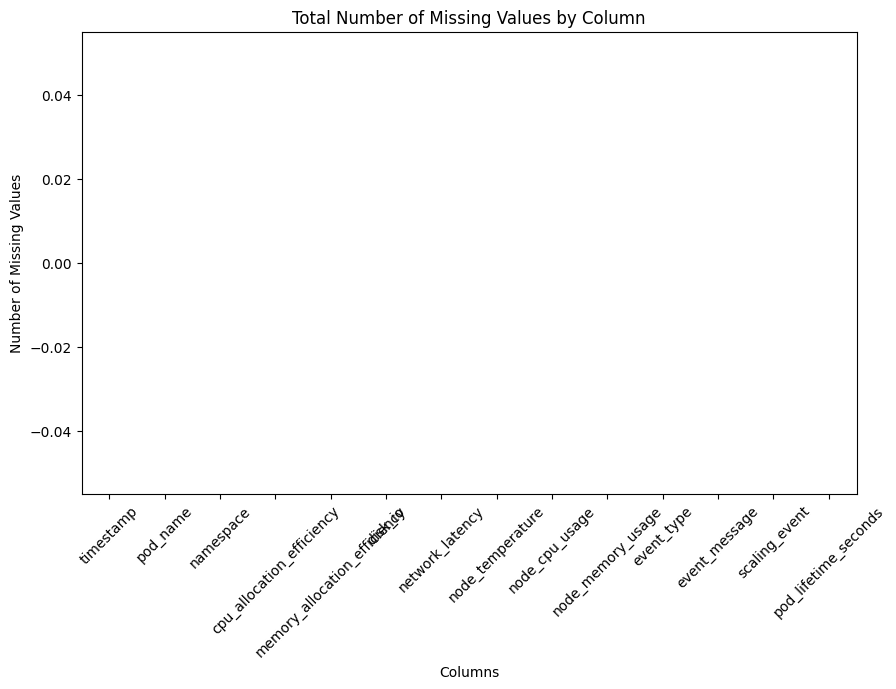

In [28]:
plt.figure(figsize=(10, 6))
missing_values.plot(kind="bar", color="skyblue")
plt.title("Total Number of Missing Values by Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45)
plt.show()

**3. Handling Missing Values**

Once we've identified the missing data, we need to decide how to handle it. Common strategies include:

**Removing Missing Data**: If a column has a significant amount of missing data or if the missingness is random, it might be best to remove those rows or columns.

In [29]:
# Drop rows with missing values
df_cleaned = df.dropna()

## 5. Data Visualization

In this section, we’ll visualize the distributions and relationships between numerical variables in the dataset. Understanding these distributions helps us detect patterns, identify anomalies, and assess the overall data quality.

The histograms below display the distribution of key numerical features in the dataset:

- **X-axis:** Represents the range of values for each feature.
- **Y-axis:** Represents the frequency of occurrences for each value range.

Each histogram allows us to observe:

1. **Central Tendencies:** What values are most common for a feature?
2. **Spread:** How wide or narrow is the range of values for the feature?
3. **Outliers:** Are there unusual values that occur infrequently and may need attention?

For example:

- **`cpu_allocation_efficiency`:** Displays how efficiently CPU resources are allocated across pods.
- **`network_latency`:** Shows the range of network delays experienced.
- **`pod_lifetime_seconds`:** Highlights the variability in pod lifetimes.

Through these visualizations, we can uncover valuable insights and assess data readiness for subsequent AI models.

### 5.1. Histograms with KDE: Central Tendencies and Spread

The following chart contains histograms for all numerical features in the dataset, overlaid with KDE (Kernel Density Estimation) curves. These visualizations help us understand:

1. **Central Tendencies:** The peaks of the KDE curves highlight the most common values for each feature.
2. **Spread:** The width of the curves shows the range of values.
3. **Patterns:** Features with multimodal distributions (multiple peaks) indicate distinct operational scenarios.

Observations from these charts can guide preprocessing decisions like scaling or normalizing features.


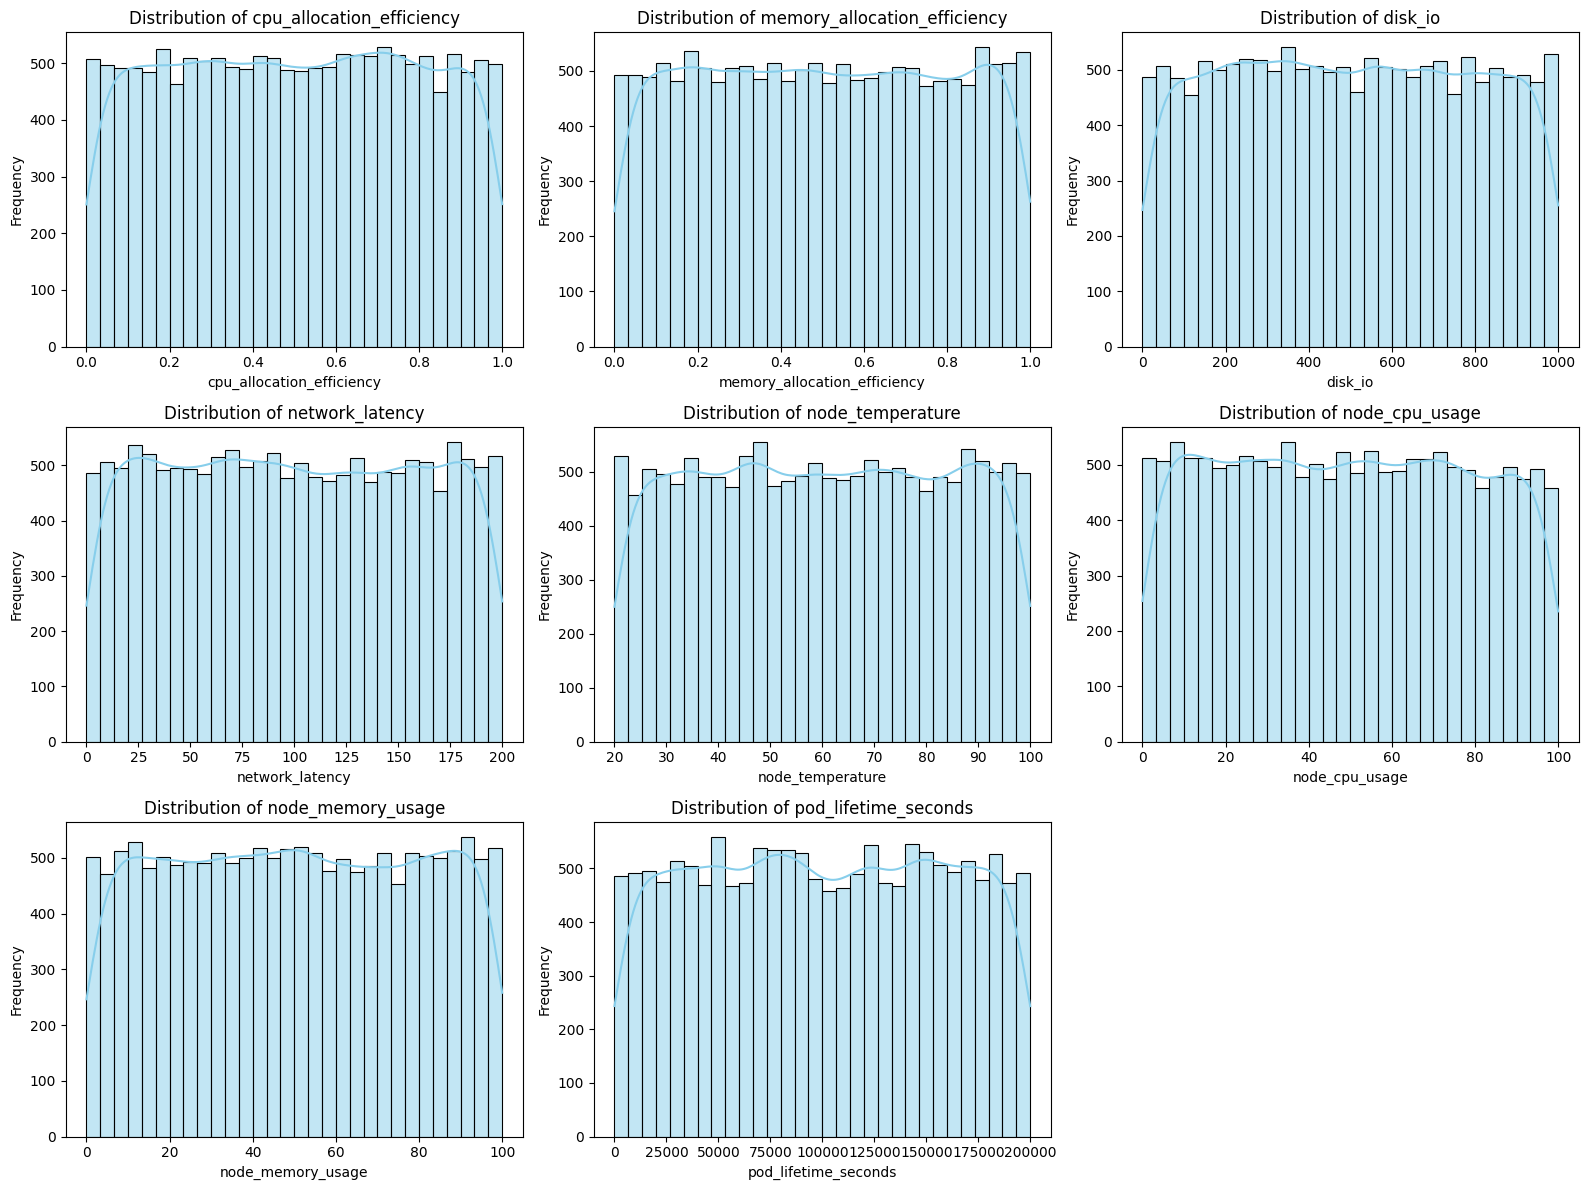

In [30]:
# List of numerical features
numerical_features = [
    "cpu_allocation_efficiency",
    "memory_allocation_efficiency",
    "disk_io",
    "network_latency",
    "node_temperature",
    "node_cpu_usage",
    "node_memory_usage",
    "pod_lifetime_seconds",
]

# Create aggregated histograms with KDE
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

# Adjust layout for readability
plt.tight_layout()
plt.show()

### How to Analyze the Histograms with KDE

Use the following guidelines to interpret the charts and extract meaningful insights:

1. **Central Tendency (Most Common Values):**
   - Look for the peak(s) in the histogram or KDE curve.
   - Identify the range where most of the data points fall.
   - Example: If a peak occurs near 0.5 for `cpu_allocation_efficiency`, it means that most pods use 50% of their allocated CPU.

2. **Spread (Range of Values):**
   - Examine the width of the distribution to understand the range of values for each feature.
   - A narrow distribution indicates consistent behavior, while a wide distribution suggests variability.
   - Example: A wide spread in `network_latency` might indicate fluctuating network performance.

3. **Shape of the Distribution:**
   - **Uniform Distribution:** Values are evenly spread, as seen in metrics like `cpu_allocation_efficiency`.
   - **Skewed Distribution:** If the peak is heavily toward one side, it indicates imbalance in the data.
   - **Multimodal Distribution:** Multiple peaks in the KDE curve suggest different operational scenarios or clusters within the data.

4. **Outliers:**
   - Check for unusually high or low bars at the edges of the histogram.
   - These outliers may represent abnormal pod or node behavior, requiring special attention in preprocessing.
   - Example: Pods with extremely high `pod_lifetime_seconds` may need to be flagged as persistent workloads.

5. **Business Context:**
   - Relate the distribution to real-world operations:
     - Are peaks where you expect them based on how Kubernetes is set up?
     - Do spreads or outliers align with known operational behaviors (e.g., high disk I/O during backups)?

### 5.2. Box Plots: Outliers and Spread

The following chart contains box plots for all numerical features in the dataset. These visualizations help us identify:

1. **Outliers:** Points beyond the whiskers indicate unusual values that deviate significantly from the rest of the data.
2. **Spread:** The interquartile range (IQR), represented by the box, shows the range of typical values for each feature.
3. **Medians:** The horizontal line inside each box indicates the median value.

Box plots are particularly useful for spotting features with extreme outliers, which may need special handling during preprocessing.

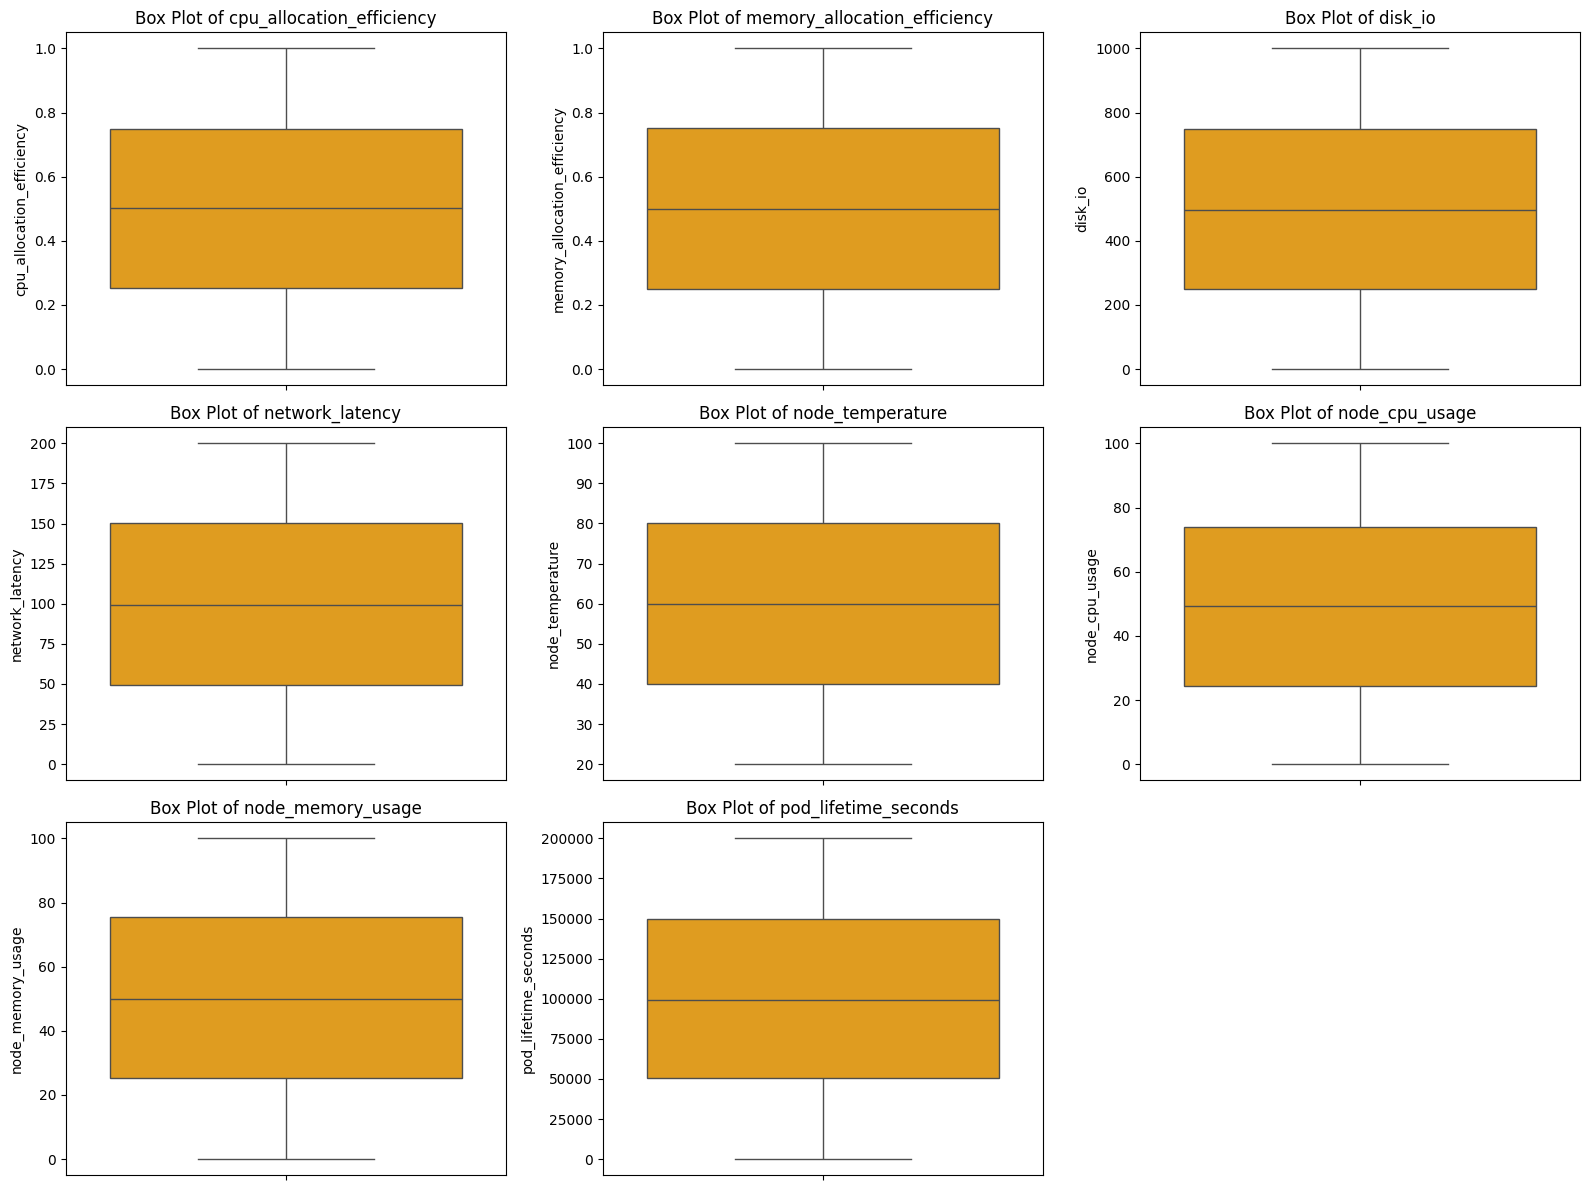

In [31]:
# Create aggregated box plots
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[feature], color="orange")
    plt.title(f"Box Plot of {feature}")
    plt.ylabel(feature)

# Adjust layout for readability
plt.tight_layout()
plt.show()

### How to Analyze Box Plots

Box plots are great tools for understanding the spread, central tendencies, and potential outliers in numerical features. Use the following guidelines to analyze the box plots:

1. **Median (Central Tendency):**
   - The horizontal line inside the box represents the **median** (50th percentile) of the data.
   - Compare the median's position within the box:
     - A centered median indicates symmetry in the data.
     - A skewed median (closer to one edge) suggests asymmetry or skewness.

2. **Spread (Interquartile Range - IQR):**
   - The box represents the **interquartile range (IQR)**, which is the range between the 25th percentile (Q1) and the 75th percentile (Q3).
   - A wider box means more variability in the middle 50% of the data, while a narrow box indicates consistent values.

3. **Whiskers (Overall Range):**
   - The lines (whiskers) extending from the box show the range of values that fall within 1.5 times the IQR.
   - Values beyond the whiskers are considered **outliers**.

4. **Outliers:**
   - Points beyond the whiskers are marked as individual dots.
   - These outliers may indicate abnormal or exceptional behavior in the data.
   - Example: In `pod_lifetime_seconds`, exceptionally high values may represent persistent pods.

5. **Symmetry and Skewness:**
   - Check if the box is symmetric around the median or skewed to one side.
   - Skewness provides insights into whether most of the data is concentrated in lower or higher ranges.

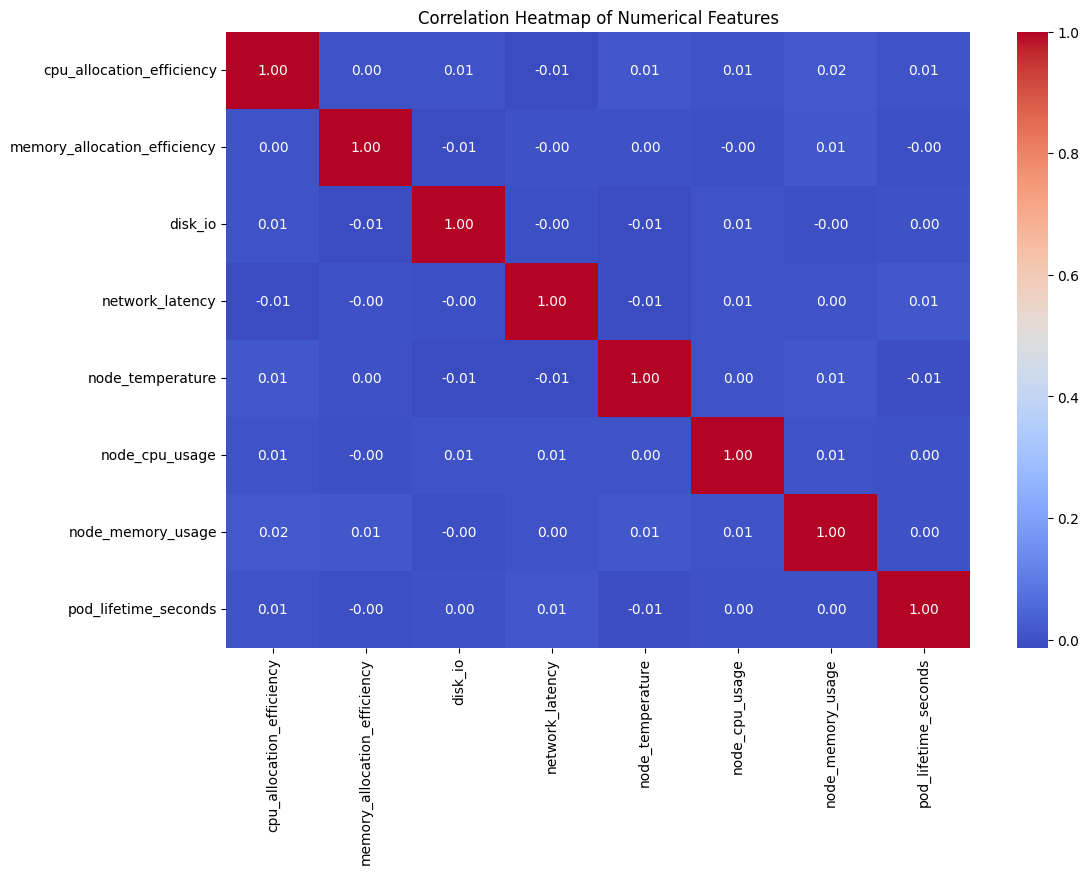

In [32]:
# Select only numeric columns
numeric_df = df_cleaned.select_dtypes(include=["float64", "int64"])

# Compute and plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## 6. Feature Engineering

Feature engineering is a critical step in preparing the dataset for machine learning. It involves transforming raw data into meaningful features that improve model performance. In this section, we’ll apply the following techniques:


### Extracting Time-Based Features

The `timestamp` column contains valuable temporal information. We can extract specific features to capture patterns over time:

- **Hour of the Day**: Helps identify workload trends throughout the day.
- **Day of the Week**: Differentiates between weekday and weekend workloads.

In [33]:
# Extract time-based features
df["hour"] = df["timestamp"].dt.hour
df["day_of_week"] = df["timestamp"].dt.dayofweek

# Display new columns
print("Time-Based Features:")
df[["timestamp", "hour", "day_of_week"]].head()

Time-Based Features:


,timestamp,hour,day_of_week
0,2023-01-01,0,6
1,2023-01-01,0,6
2,2023-01-01,0,6
3,2023-01-01,0,6
4,2023-01-01,0,6


### Encoding Categorical Variables

Categorical columns like `namespace`, `event_type`, and `event_message` need to be converted into numerical formats. We’ll apply:

- **One-Hot Encoding**: For columns with a small number of unique categories (e.g., `namespace`, `event_type`).
- **Binary Encoding**: Convert binary columns like `scaling_event` into `0` or `1`.

In [34]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=["namespace", "event_type", "event_message"])

# Encode binary column
df_encoded["scaling_event"] = df_encoded["scaling_event"].astype(int)

# Display encoded columns
print("Encoded Categorical Features:")
df_encoded.head()

Encoded Categorical Features:


,timestamp,pod_name,cpu_allocation_efficiency,memory_allocation_efficiency,disk_io,network_latency,node_temperature,node_cpu_usage,node_memory_usage,scaling_event,...,namespace_kube-system,namespace_prod,event_type_Error,event_type_Normal,event_type_Warning,event_message_Completed,event_message_Failed,event_message_Killed,event_message_OOMKilled,event_message_Started
0,2023-01-01,pod_0,0.038162,0.949259,9.993579,13.722542,77.619073,93.177619,37.900532,0,...,False,False,False,False,True,False,False,True,False,False
1,2023-01-01,pod_1,0.500763,0.048543,935.792442,55.493953,84.182245,61.442289,5.208161,1,...,False,False,True,False,False,False,True,False,False,False
2,2023-01-01,pod_2,0.746726,0.447345,328.352359,173.910016,21.295244,55.819311,18.335802,1,...,True,False,False,True,False,True,False,False,False,False
3,2023-01-01,pod_3,0.526692,0.870251,778.297708,67.395729,85.028829,78.968463,94.619689,1,...,False,False,False,False,True,False,False,False,True,False
4,2023-01-01,pod_4,0.425342,0.885459,711.181295,91.724730,29.157695,52.718141,70.770594,0,...,False,True,True,False,False,False,False,True,False,False


### Creating Derived Features

Derived features combine or transform existing columns to create new, meaningful insights. Examples include:

- **Resource Efficiency**: Combine CPU and memory efficiencies into a single score.
- **IO-Latency Ratio**: Understand the relationship between disk IO and network latency.

In [35]:
# Create derived features
df["resource_efficiency"] = (
    df["cpu_allocation_efficiency"] + df["memory_allocation_efficiency"]
) / 2
df["io_latency_ratio"] = df["disk_io"] / (df["network_latency"] + 1)

# Display new derived features
print("Derived Features:")

df[
    ["cpu_allocation_efficiency", "memory_allocation_efficiency", "resource_efficiency"]
].head()


Derived Features:


,cpu_allocation_efficiency,memory_allocation_efficiency,resource_efficiency
0,0.038162,0.949259,0.493711
1,0.500763,0.048543,0.274653
2,0.746726,0.447345,0.597035
3,0.526692,0.870251,0.698472
4,0.425342,0.885459,0.655401


In [36]:
df[["disk_io", "network_latency", "io_latency_ratio"]].head()

,disk_io,network_latency,io_latency_ratio
0,9.993579,13.722542,0.678794
1,935.792442,55.493953,16.564471
2,328.352359,173.910016,1.877264
3,778.297708,67.395729,11.379332
4,711.181295,91.724730,7.669813


### Scaling and Normalization

Scaling ensures that features with large ranges (e.g., `pod_lifetime_seconds`) don’t dominate others with smaller ranges (e.g., `cpu_allocation_efficiency`). Normalization improves numerical stability for machine learning algorithms, especially deep learning models.

We’ll use two common techniques:
1. **Standardization (Z-Score Scaling)**: Scales features to have a mean of 0 and a standard deviation of 1.
2. **Normalization (Min-Max Scaling)**: Scales features to a fixed range, usually between 0 and 1.

Both techniques will be applied to numerical features.

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Instantiate scalers
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

# Scale the numerical features
standard_scaled_df = pd.DataFrame(
    standard_scaler.fit_transform(df_cleaned[numerical_features]),
    columns=numerical_features,
)

min_max_scaled_df = pd.DataFrame(
    min_max_scaler.fit_transform(df_cleaned[numerical_features]),
    columns=numerical_features,
)

# Display scaled data
print("Standard Scaled Features:")
standard_scaled_df.describe()


Standard Scaled Features:


,cpu_allocation_efficiency,memory_allocation_efficiency,disk_io,network_latency,node_temperature,node_cpu_usage,node_memory_usage,pod_lifetime_seconds
count,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04
mean,-1.409243e-16,4.357995e-17,-4.476419e-17,-1.956361e-16,-1.222134e-16,-5.352755e-17,-1.061077e-16,8.858099e-17
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-1.737240e+00,-1.729933e+00,-1.735786e+00,-1.723046e+00,-1.734523e+00,-1.715744e+00,-1.733065e+00,-1.741141e+00
25%,-8.609424e-01,-8.679550e-01,-8.644918e-01,-8.668220e-01,-8.665986e-01,-8.668565e-01,-8.631552e-01,-8.642811e-01
50%,2.468570e-03,-5.774378e-03,-8.502965e-03,-1.321860e-02,-3.796380e-03,-4.308987e-03,-4.539033e-03,-1.216880e-02
75%,8.562485e-01,8.674397e-01,8.616722e-01,8.758836e-01,8.670662e-01,8.528289e-01,8.726451e-01,8.647607e-01
max,1.731810e+00,1.720070e+00,1.738738e+00,1.729533e+00,1.726134e+00,1.758750e+00,1.722078e+00,1.736438e+00


In [38]:
print("\nMin-Max Scaled Features:")
min_max_scaled_df.describe()


Min-Max Scaled Features:


,cpu_allocation_efficiency,memory_allocation_efficiency,disk_io,network_latency,node_temperature,node_cpu_usage,node_memory_usage,pod_lifetime_seconds
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.500783,0.501429,0.499575,0.499061,0.501212,0.493811,0.501590,0.500676
std,0.288273,0.289864,0.287819,0.289648,0.288972,0.287821,0.289433,0.287566
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.252605,0.249849,0.250767,0.247995,0.250797,0.244320,0.251772,0.252147
50%,0.501494,0.499756,0.497128,0.495232,0.500115,0.492571,0.500276,0.497177
75%,0.747608,0.752861,0.747572,0.752750,0.751762,0.739265,0.754154,0.749344
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 7. Handling Outliers

Outliers can distort model training. We’ll cap extreme values to reduce their impact. For example:

- **Capping `pod_lifetime_seconds`**: Restrict values to within the 1st and 99th percentiles.

In [39]:
# Define a function to cap outliers
def cap_outliers(df, columns, lower_quantile=0.01, upper_quantile=0.99):
    capped_df = df.copy()
    for col in columns:
        lower_bound = capped_df[col].quantile(lower_quantile)
        upper_bound = capped_df[col].quantile(upper_quantile)
        capped_df[col] = capped_df[col].clip(lower=lower_bound, upper=upper_bound)
    return capped_df


# Apply outlier capping to numerical features
df_capped = cap_outliers(df, numerical_features)

# Display capped data
print("Data after outlier capping:")
df_capped[numerical_features].describe()

Data after outlier capping:


,cpu_allocation_efficiency,memory_allocation_efficiency,disk_io,network_latency,node_temperature,node_cpu_usage,node_memory_usage,pod_lifetime_seconds
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.500843,0.501460,499.590320,99.812400,60.087952,49.390752,50.163471,100123.480500
std,0.288050,0.289669,287.597839,57.892793,23.098823,28.755977,28.924046,57466.606247
min,0.009529,0.011022,10.770664,2.411780,20.864345,1.082998,0.931380,2024.930000
25%,0.252717,0.249897,250.814566,49.599228,40.059461,24.448180,25.184379,50425.750000
50%,0.501555,0.499775,497.133849,99.046093,60.000056,49.266834,50.032371,99422.500000
75%,0.747617,0.752850,747.535380,150.549303,80.126939,73.929835,75.417713,149846.250000
max,0.990310,0.991795,990.840403,198.008607,99.198388,98.872202,99.021863,198037.000000


## 8. Interactive Data Exploration

Use interactive widgets to explore data.

In [40]:
# Interactive function to plot feature distributions
def plot_feature_distribution(feature):
    plt.figure(figsize=(10, 5))
    sns.histplot(df_capped[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()


# Dropdown widget for selecting feature
feature_dropdown = widgets.Dropdown(
    options=df_capped.select_dtypes(include=[np.number]).columns,
    description="Feature:",
    disabled=False,
)

# Display interactive plot
interact(plot_feature_distribution, feature=feature_dropdown)

interactive(children=(Dropdown(description='Feature:', options=('cpu_allocation_efficiency', 'memory_allocatio…

<function __main__.plot_feature_distribution(feature)>

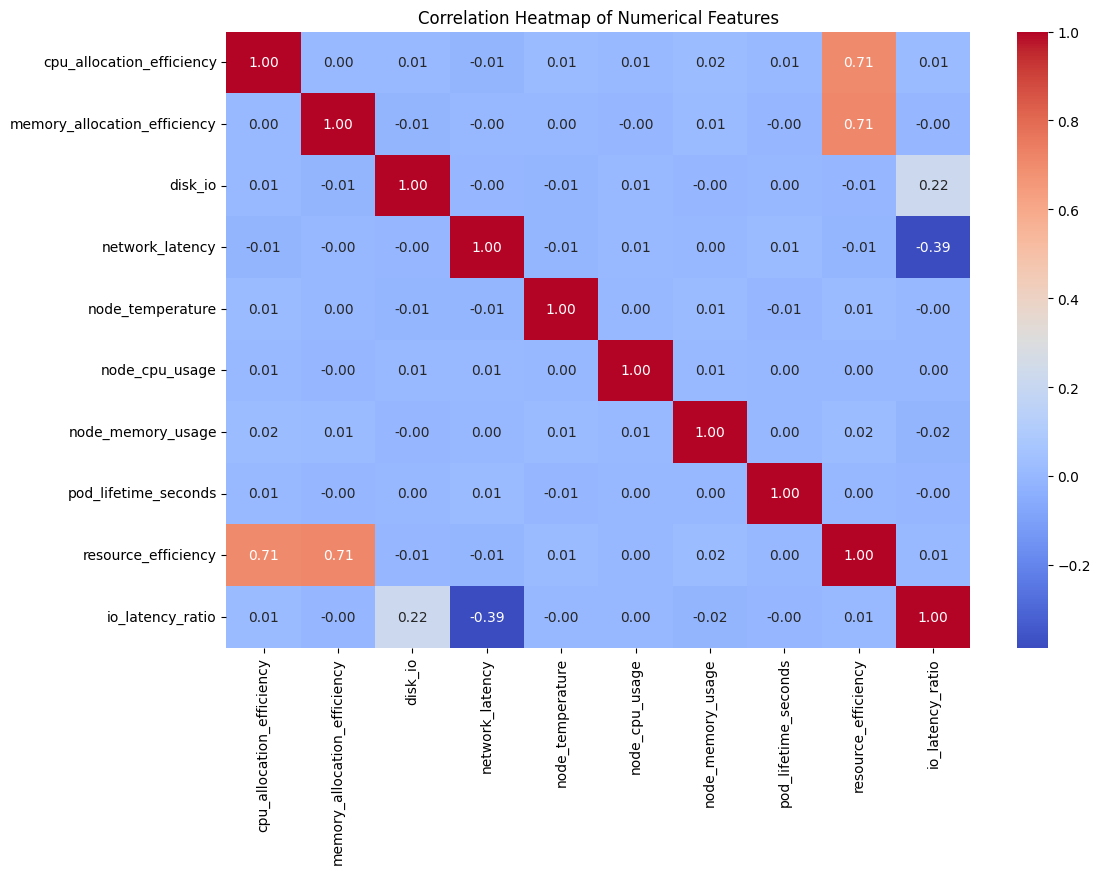

In [41]:
# Select only numeric columns
numeric_df = df_capped.select_dtypes(include=["float64", "int64"])

# Compute and plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [42]:
# Save preprocessed data
df_capped.to_csv("data/preprocessed_kubernetes_data.csv", index=False)
print("Preprocessed dataset saved.")

Preprocessed dataset saved.


## 9. Conclusion

In this notebook, we have:

- Loaded and examined the Kubernetes operational dataset.
- Handled missing values.
- Visualized data distributions and relationships.
- Engineered new features.
- Utilized interactive widgets for data exploration.

This preprocessing sets the stage for building predictive models in subsequent notebooks.

**Next Steps:**

With the data preprocessed, you are now ready to proceed to the next notebook, which will focus on building machine learning models to predict incidents based on the operational data.